# Bike sharing demand


# 1-getting data

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

path = "~/aiffel/LinerRegression/bike-sharing-demand/train.csv"
df = pd.read_csv(path)
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


# 2-arranging datetime

In [102]:
datetime = pd.to_datetime(data["datetime"], format="%Y-%m-%d %H:%M:%S", errors="raise")
df["year"] = datetime.dt.year
df["month"] = datetime.dt.month
df["day"] = datetime.dt.day
df["hour"] = datetime.dt.hour
df["minute"] = datetime.dt.minute
df["second"] = datetime.dt.second
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


# 3-visualizing datetime

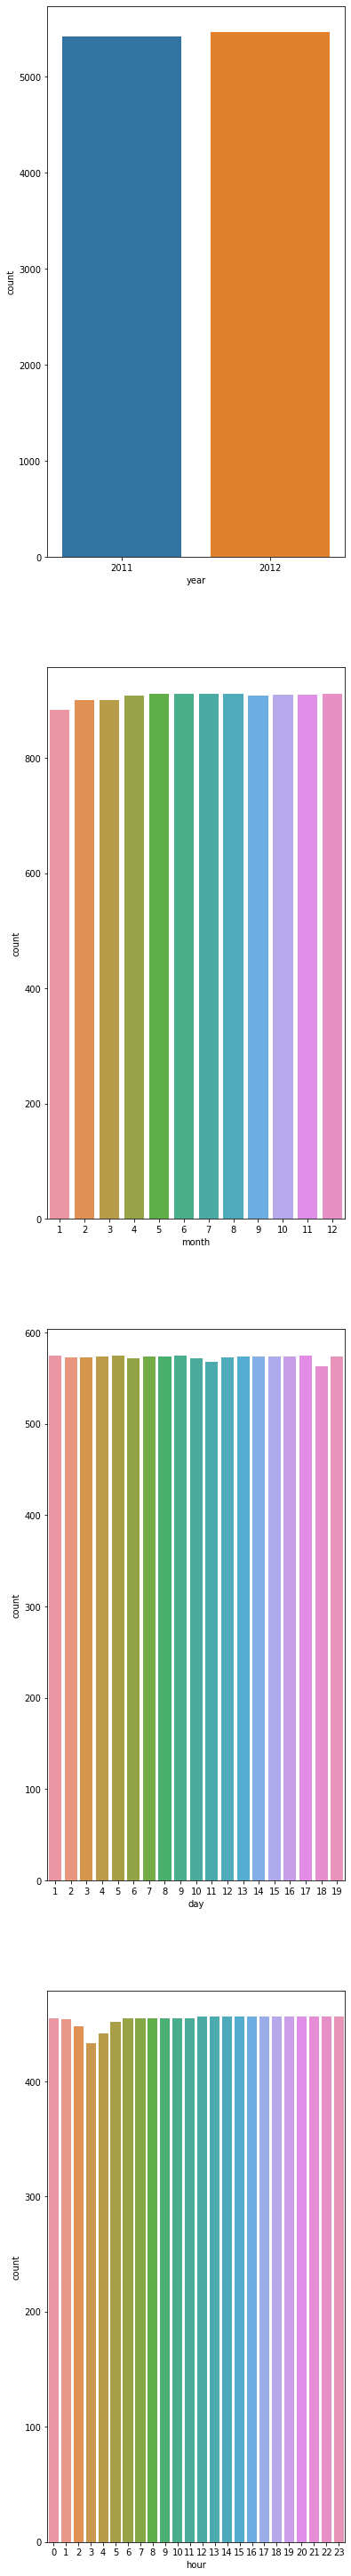

In [103]:
fig, ax = plt.subplots(nrows=4)
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=10)
sns.countplot(x="year", data=df, ax=ax[0])
sns.countplot(x="month", data=df, ax=ax[1])
sns.countplot(x="day", data=df, ax=ax[2])
sns.countplot(x="hour", data=df, ax=ax[3])
#sns.countplot(x="minute", data=df, ax=ax[4])
#sns.countplot(x="second", data=df, ax=ax[5])
plt.show()

# 4-arranging feature factor and transforming ndarray

In [150]:
df_list = df.values.tolist()
df_count = df["count"]
list_X = df_list
list_y = df_count.values.tolist()
X = np.array(list_X)
y = np.array(list_y)

terminate = [0, 11, 12, 16, 17]
X = np.delete(X, terminate, axis=1)
X = np.array(X, dtype=np.float64)
y = np.array(y, dtype=np.float64)
print(X[0])

[ 1.     0.     0.     1.     9.84  14.395 81.     0.     3.    13.
  1.     1.     0.   ]


# 5-splitting train and test data

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train.dtype)

(7620, 13) (3266, 13) (7620,) (3266,)
float64


# 6-learning LinearRegression Model

In [152]:
lrm = LinearRegression().fit(X_train, y_train)
print(lrm)

LinearRegression()


# 7-evaluating LinearRegression Model

1.8378204165601076e-25
4.2869807750444923e-13


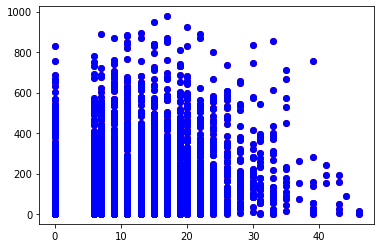

In [153]:
def loss_mse(y_prediction, y):
    n = len(y)
    return ((y-y_prediction)**2).mean()
    
def loss_rmse(y_prediction, y):
    return np.sqrt(((y-y_prediction)**2).mean())
    
y_prediction = lrm.predict(X_test)
print(loss_mse(y_prediction, y_test))
print(loss_rmse(y_prediction, y_test))
plt.scatter(X_test[:, 7], y_prediction, color='red')
plt.scatter(X_test[:, 7], y_test, color='blue')

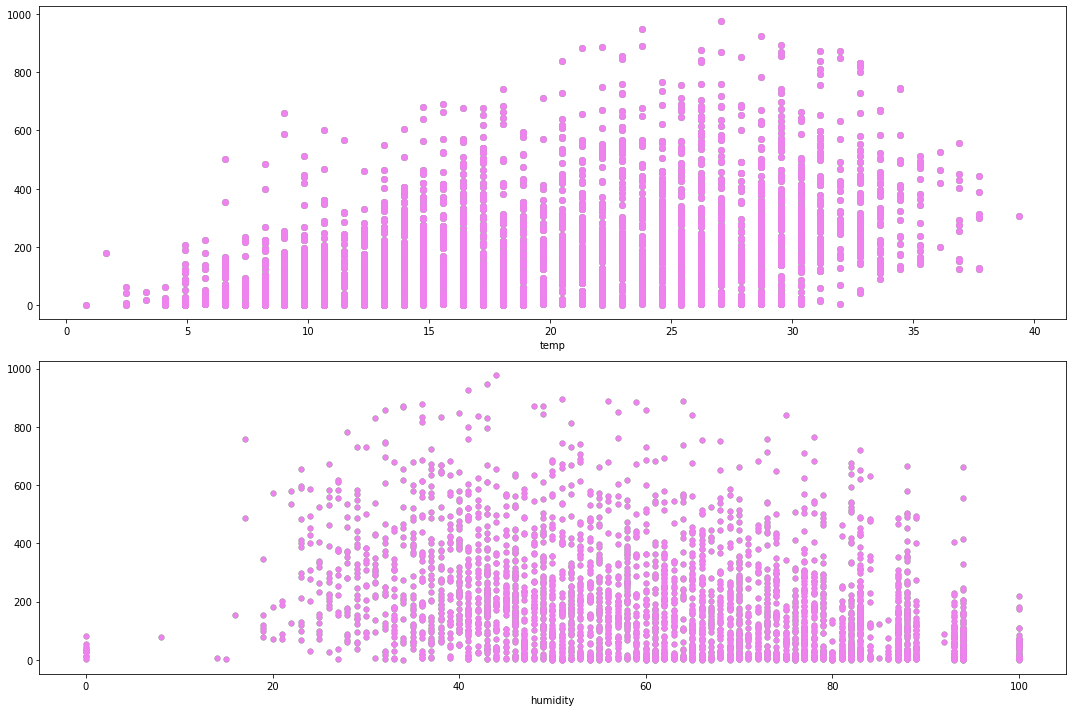

In [154]:
plt.figure(figsize=(15,10))
plt.subplot(2, 1, 1, )
plt.scatter(X_test[:, 4], y_prediction, color="limegreen")
plt.scatter(X_test[:, 4], y_test, color="violet")
plt.xlabel("temp")

plt.subplot(2, 1, 2)
plt.xlabel("humidity")
plt.scatter(X_test[:, 6], y_prediction, s=5**2, color="limegreen")
plt.scatter(X_test[:, 6], y_test, s=5**2, color="violet")

plt.tight_layout()
plt.show()